In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# SCENARIO

The datasets and the tasks herein, were gotten from EntryLevel (https://app.entrylevel.net/data-analyst)

You're a Data Analyst working for the education tech company Udemy. You have been asked by your manager, Head of Curriculum at Udemy, to present the data on course revenue, and you have been provided with data on courses from different topics to understand where opportunities to increase revenue may lie, and track the performances of courses.

Your manager has suggested Web Development courses to charge more because she belives that these are the most popular courses. She needs to send a report to the CEO in the next three weeks on how they will increase their next quarterly earnings. 

# Framing the Problem
Business Problem: Udemy needs to increase its rquarterly earnings without affecting the performances of the courses
Duration of project: 3 weeks
Data to be collected aand form of presentation: the following form of data should be collected; 
1. previous revenue
2. performance of all courses
3. most popular courses, to validate the manager's suggestion about charging more on Web Development coursesdue to their populaity

Data should be presented using the following
Tables
Pivot Tables
Graphs and Charts
Reports

# Questions Guiding the Business Problem
1. What's the total revenue for the last quarter 
2. What is the percentage of each course to the revenue
3. WHo the learners of each course
4. What profession of learners is more popular among the learners
5. What is the relationship between course performance and the change in revenue?
6. What are the top 5 courses and their level of populairty
7. How do learners rate the course they take?

In [3]:
web = pd.read_excel("web development.xlsx")
web.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [4]:
business = pd.read_excel('business courses.xlsx')
business.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536.0,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668.0,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826.0,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance


In [5]:
music = pd.read_excel('music courses.xlsx')
music.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,0,101154,1042,95,All Levels,0.88,4.5,2012-06-15T17:00:33Z,Musical Instruments
1,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,200,75499,7676,362,Beginner Level,0.96,30.0,2014-08-07T06:27:51Z,Musical Instruments
2,41884,Getting Started with Playing Guitar,https://www.udemy.com/getting-started-with-pla...,0,47652,1141,26,All Levels,0.68,4.0,2013-05-29T15:28:07Z,Musical Instruments
3,42271,Complete Guitar System - Beginner to Advanced,https://www.udemy.com/complete-guitar-system-b...,145,32935,2713,310,All Levels,0.65,34.0,2013-05-29T15:24:47Z,Musical Instruments
4,26956,Learn Guitar in 21 Days,https://www.udemy.com/learn-guitar-in-21-days/,20,26504,192,82,All Levels,0.41,2.5,2012-10-21T20:36:50Z,Musical Instruments


In [6]:
design = pd.read_excel('design courses.xlsx')
design.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,348116.0,Photoshop In-Depth: Master all of Photoshop's ...,https://www.udemy.com/photoshop-tools/,0.0,53851.0,1779.0,45.0,All Levels,0.69,4.5,2014-11-30T04:22:11Z,Graphic Design
1,17349.0,Figure Drawing From Life Using The Reilly Tech...,https://www.udemy.com/figure-drawing-from-life...,0.0,47811.0,1041.0,22.0,Beginner Level,0.11,2.5,2012-05-09T18:14:57Z,Graphic Design
2,399938.0,Professional Logo Design in Adobe Illustrator,https://www.udemy.com/professional-logo-design...,0.0,44044.0,1563.0,45.0,Beginner Level,0.89,7.5,2015-01-22T11:18:06Z,Graphic Design
3,820194.0,Photoshop for Entrepreneurs - Design 11 Practi...,https://www.udemy.com/photoshop-for-entreprene...,200.0,36288.0,737.0,63.0,All Levels,0.96,5.0,2016-06-09T01:57:03Z,Graphic Design
4,249126.0,Logo Design Essentials,https://www.udemy.com/logo-design/,20.0,33205.0,481.0,12.0,Beginner Level,0.88,0.7,2014-06-30T03:09:27Z,Graphic Design


In [7]:
merged_data = [web, business, music, design]
df = pd.concat(merged_data)
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
599,1177156.0,Como Criar Logos de Sucesso - Start Designer,https://www.udemy.com/como-criar-logos-de-suce...,25.0,0.0,0.0,29.0,All Levels,0.76,6.0,2017-06-30T05:48:57Z,Graphic Design
600,1128984.0,Photoshop - Aprende a Transformar ImÃ¡genes,https://www.udemy.com/photoshop-aprende-a-tran...,20.0,0.0,0.0,14.0,All Levels,0.76,1.0,2017-03-08T18:05:51Z,Graphic Design
601,177614.0,Super Textos con Photoshop,https://www.udemy.com/super-textos-con-photoshop/,20.0,0.0,0.0,8.0,All Levels,0.76,2.0,2014-03-31T20:31:04Z,Graphic Design
602,1137738.0,Photoshop - CreaciÃ³n de Efectos,https://www.udemy.com/photoshop-creacion-de-ef...,20.0,0.0,0.0,11.0,Beginner Level,0.76,1.0,2017-03-24T20:06:57Z,Graphic Design


In [8]:
df.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [9]:
df.tail(0)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3681 entries, 0 to 603
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3677 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 373.9+ KB


In [11]:
df.shape

(3681, 12)

In [12]:
df.ndim

2

In [13]:
df.isnull().sum()

course_id              5
course_title           5
url                    5
price                  5
num_subscribers        5
num_reviews            5
num_lectures           5
level                  5
Rating                 4
content_duration       5
published_timestamp    5
subject                4
dtype: int64

In [14]:
df.duplicated().sum()

2

In [15]:
df1 = df.dropna()
df1.isnull().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [16]:
df1.drop_duplicates()
df1.duplicated().sum()

0

In [17]:
df1.head(0)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject


In [18]:
new_df = df1.rename(columns = {'Rating':'rating'})
new_df.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [19]:
renamed_sub = new_df.replace("Subject: Web Development", "Web Development")
renamed_sub.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Web Development


In [20]:
#to extract date from timestamp.
import  datetime
#using pandas .dt.date
#since the time_stamp column is an object, it needs to be converted into a date_time object

#convert time_stamp column to datetime object
date_time = pd.to_datetime(renamed_sub['published_timestamp'])
date_time

0     2013-02-14 07:03:41+00:00
1     2013-06-09 15:51:55+00:00
2     2015-11-02 21:13:27+00:00
3     2014-04-08 16:21:30+00:00
4     2016-03-08 22:28:36+00:00
                 ...           
599   2017-06-30 05:48:57+00:00
600   2017-03-08 18:05:51+00:00
601   2014-03-31 20:31:04+00:00
602   2017-03-24 20:06:57+00:00
603   2014-04-15 21:52:12+00:00
Name: published_timestamp, Length: 3676, dtype: datetime64[ns, UTC]

In [21]:
#code to extract date 
dates = date_time.dt.date
dates

0      2013-02-14
1      2013-06-09
2      2015-11-02
3      2014-04-08
4      2016-03-08
          ...    
599    2017-06-30
600    2017-03-08
601    2014-03-31
602    2017-03-24
603    2014-04-15
Name: published_timestamp, Length: 3676, dtype: object

In [22]:
#Add the extracted date to a new column
renamed_sub['date'] = dates
renamed_sub.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,date
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Web Development,2013-02-14
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Web Development,2013-06-09
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Web Development,2015-11-02
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Web Development,2014-04-08
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Web Development,2016-03-08


In [23]:
#Using the IF function to know how many courses are free and how many are paid


renamed_sub.loc[renamed_sub['price'] == 0, 'paid_or_free'] = 'Free' 
renamed_sub.loc[renamed_sub['price'] > 0, 'paid_or_free'] = 'Paid' 

renamed_sub.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,date,paid_or_free
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Web Development,2013-02-14,Free
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Web Development,2013-06-09,Free
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Web Development,2015-11-02,Paid
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Web Development,2014-04-08,Free
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Web Development,2016-03-08,Paid


# PIVOT TABLES & CHARTS

# Total Number of Subscribers for Each Subject: Pivot Table and Pie Chart

In [24]:
#create a pivot table to show the total number of subscribers for each subject, then create a pie chart
subj_subscribers = pd.pivot_table(renamed_sub, index = 'subject', values = 'num_subscribers', aggfunc = 'sum', margins = False, margins_name = 'Total')
subj_subscribers

,num_subscribers
subject,
Business Finance,1868711.0
Graphic Design,1063148.0
Musical Instruments,846689.0
Web Development,7981935.0


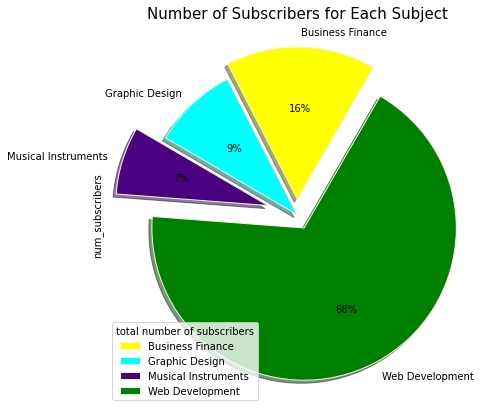

In [25]:
#explode pie 
explode = (0.1, 0.0, 0.2, 0.1)
#wedge properties
wp = {'linewidth': 1, 'edgecolor':'beige'}
#creating color parameters
colors = ('yellow', 'cyan', 'indigo', 'green')
plt.rcParams['figure.figsize'] = [7, 7]
#creating plot
subj_subscribers.plot(kind = "pie", y = 'num_subscribers',
        autopct = '%.0f%%', 
        explode = explode, 
        shadow = True, 
        colors = colors, 
        wedgeprops = wp,
        startangle = 60).legend(loc = 'lower left', title = 'total number of subscribers') 
plt.title('Number of Subscribers for Each Subject', fontsize = 15)
plt.savefig('Number of Subscribers for Each Subject.png')
#show plot
plt.show()

# Average Number of Subscribers for each Subject (Pivot Table and Bar Chart)

In [26]:
#Average number of subscribers for each subject and plot a bar chart

subj_subscribers1 = pd.pivot_table(renamed_sub, index = 'subject', values = 'num_subscribers')
subj_subscribers1

,num_subscribers
subject,
Business Finance,1569.026868
Graphic Design,1766.026578
Musical Instruments,1245.130882
Web Development,6635.024938


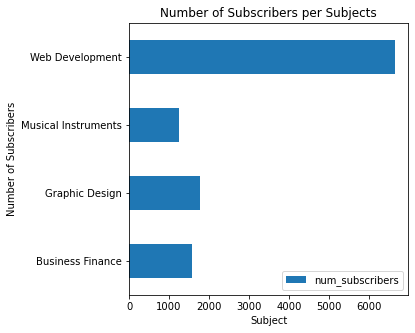

In [28]:
subj_subscribers1.plot(kind = 'barh', title = 'Number of Subscribers per Subjects')
plt.xlabel('Subject')
plt.ylabel('Number of Subscribers')
plt.rcParams['figure.figsize'] = [5, 5]

# Average Cost Per Subject at Each Level

In [29]:
renamed_sub.head(0)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,date,paid_or_free


In [30]:
#pivot table summarizing the average cost per subject at each level
avg_sub = pd.pivot_table(renamed_sub, index = 'subject', values = 'price', columns = 'level')
avg_sub

level,All Levels,Beginner Level,Expert Level,Intermediate Level
subject,,,,
Business Finance,70.197472,68.734336,65.800000,62.014925
Graphic Design,62.119403,50.679348,28.571429,59.407895
Musical Instruments,49.583333,48.984962,48.333333,51.602564
Web Development,74.549763,78.542654,67.142857,85.074627


Text(0, 0.5, 'Cost per subject')

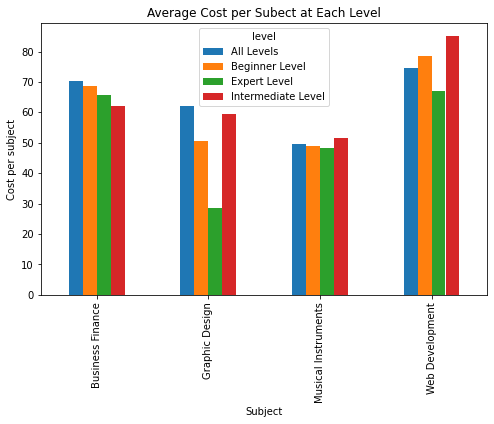

In [31]:
#a bar plot of the avg_sub pivot table
avg_sub.plot(kind = 'bar', title = 'Average Cost per Subect at Each Level', figsize = (8, 5))
#titling both axis
plt.xlabel('Subject')
plt.ylabel('Cost per subject')

# Average Content Duration for Each Subject(Pivot Table and Bar Chart)

In [32]:
#a pivot table for the average content duration for each subject
avg_cont_dur = pd.pivot_table(renamed_sub, index = 'subject', values = 'content_duration')
avg_cont_dur

,content_duration
subject,
Business Finance,3.557697
Graphic Design,3.585465
Musical Instruments,2.854387
Web Development,5.586658


<AxesSubplot:title={'center':'Average Content Duration for Each Subject'}, ylabel='subject'>

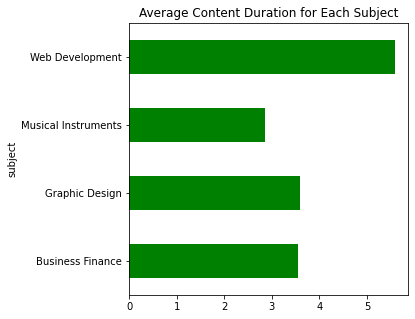

In [33]:
#plotting a bar chart
avg_cont_dur.plot(kind = 'barh', title = 'Average Content Duration for Each Subject', 
                  figsize = (5, 5), 
                  legend = False, 
                  color = 'green')


# Average Rating Per Subject for Each Level (Column Chart)

In [128]:
#pivot table for average rating per subject for each level
avg_rating = pd.pivot_table(renamed_sub, index = 'subject', values = 'rating', columns = 'level')
avg_rating

level,All Levels,Beginner Level,Expert Level,Intermediate Level
subject,,,,
Business Finance,0.691517,0.686216,0.700000,0.695373
Graphic Design,0.730985,0.727065,0.884286,0.721579
Musical Instruments,0.312037,0.313835,0.296667,0.281026
Web Development,0.645466,0.635379,0.498571,0.670896


<AxesSubplot:title={'center':'Average Rating Per Subject'}, xlabel='subject'>

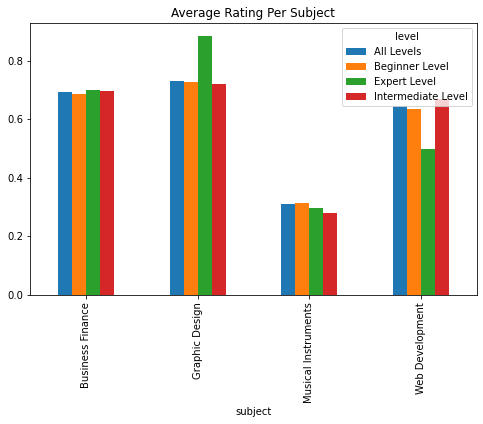

In [221]:
#a bar chart 
avg_rating.plot(kind = 'bar', title = 'Average Rating Per Subject', figsize = (8, 5))

# Total Number of Subscribers for Free or Paid Subject

In [152]:
free_or_paid = pd.pivot_table(renamed_sub, index = 'subject', values = 'num_subscribers', columns = 'paid_or_free', aggfunc= 'sum')
free_or_paid

paid_or_free,Free,Paid
subject,,
Business Finance,603228.0,1265483.0
Graphic Design,284821.0,778327.0
Musical Instruments,304735.0,541954.0
Web Development,2393767.0,5588168.0


<AxesSubplot:title={'center':'Total Number of Subscribers of Free or Paid Subject'}, ylabel='subject'>

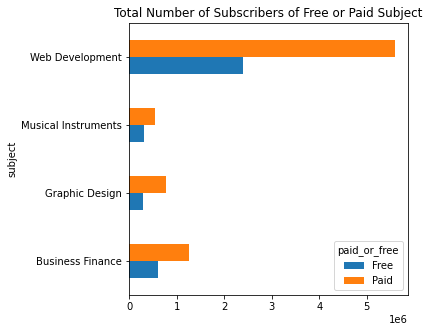

In [153]:
free_or_paid.plot(kind = 'barh', title = 'Total Number of Subscribers of Free or Paid Subject', figsize = (5,5))

In [154]:
avg_free_or_paid = pd.pivot_table(renamed_sub, index = 'subject', values = 'num_subscribers', columns = 'paid_or_free')
avg_free_or_paid

paid_or_free,Free,Paid
subject,,
Business Finance,6283.625000,1155.692237
Graphic Design,8137.742857,1372.710758
Musical Instruments,6624.673913,854.817035
Web Development,17863.932836,5227.472404


<AxesSubplot:title={'center':'Average Number of Subscribers of Free or Paid Subject'}, xlabel='subject'>

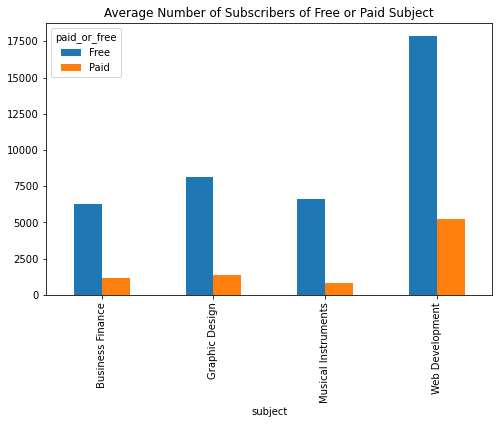

In [161]:
avg_free_or_paid.plot(kind = 'bar', title = 'Average Number of Subscribers of Free or Paid Subject', figsize = (8, 5))

# Total Count of Rating per Subject


In [165]:
subj_rating = pd.pivot_table(renamed_sub, index = 'subject', values = 'rating', aggfunc='count')
subj_rating

,rating
subject,
Business Finance,1191
Graphic Design,602
Musical Instruments,680
Web Development,1203


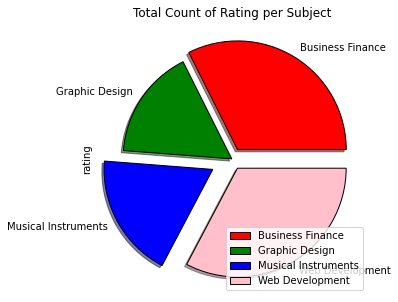

In [191]:
explode1 = [0.1, 0.0, 0.2, 0.1]
wedgeprops = {'linewidth' : 1, 'edgecolor':'black'}
color = ('red', 'green', 'blue', 'pink')
subj_rating.plot(kind = 'pie', y = 'rating', figsize = (5, 5), explode = explode1,
                colors = color,
                wedgeprops = wedgeprops,
                shadow = True,
                title = 'Total Count of Rating per Subject').legend(loc = 'best')

# Number of Subscribers at Each Level

In [195]:
level_subj= pd.pivot_table(renamed_sub, index = 'subject', columns = 'level', values = 'num_subscribers', aggfunc='sum')
level_subj

level,All Levels,Beginner Level,Expert Level,Intermediate Level
subject,,,,
Business Finance,1083460.0,538021.0,35499.0,211731.0
Graphic Design,630287.0,359588.0,6331.0,66942.0
Musical Instruments,465044.0,285531.0,16392.0,79722.0
Web Development,4081578.0,2959404.0,221889.0,719064.0


<AxesSubplot:title={'center':'Number of Subscribers at Each Level'}, ylabel='subject'>

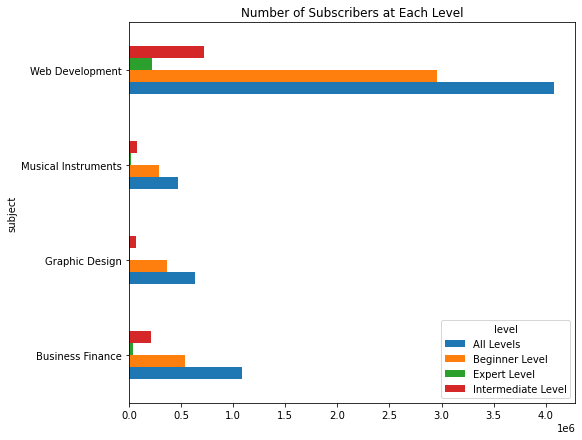

In [209]:
level_subj.plot(kind = 'barh', title = 'Number of Subscribers at Each Level', figsize = (8,7))

In [34]:
renamed_sub.head(0)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,date,paid_or_free


In [ ]:
level_subj= pd.pivot_table(renamed_sub, index = 'subject', columns = 'level', values = 'num_subscribers', aggfunc='sum')
level_subj

# Analysis
It can be observed from the visualizations above that Web Development happens to be the most popular subject with the highest number of subscribers among all the subjects. It is followed by Business Finance, Graphic Design and Musical Instrument. Also, Web Development has the highest number of subscribers for paid courses. However, on average, Subject rating by subscribers has Graphic Design topping the chart, followed by Business Finance, then Web Development and lastly, musical instruments.
Going by the root cause analysis as to why web development is the most popular subject even when it has more paid subjects and is costlier than other subjects, it can be deduced that more people subscribe to the subjects at the beginner’s level. This implies that many people who have no prior web development knowledge can easily learn Web Development as its entry barrier is relatively low and an easy route to gain technological skills or transistion to a Tech career. It also has more subscribers at every other level.
Also, web development could be more popular among subscribers because of its content duration. Longer content duration could mean more and higher quality content to subscribers and vice versa.
From the above analysis, it can be said that Web Development is indeed the most popular subject in Udemy and prices attached to Wed Development subjects can be increased to increase the company's revenue. 


# Conclusion

The findings in this report clearly show that an increase in price for Web Development would significantly have an impact on the course revenue of Udemy. Going by the fact that there is a surge of entry-level subscribers in Web Development, the popularity of Web Development, the trend in people seeking jobs in the tech industry as well as people who are looking for an easy way to switch their career to a tech role. A slight increase in the price of Web Development, therefore, will have no significant impact on the number of people demanding the course. In fact, it is expected that there will be a continuous increase in the number of Web Development Subscribers. It is recommended that the price of Web Development be increased. However, the quality of the course should be improved to give subscribers value for their money. Thus helping to increase the rating for the subject.


# Recommendation

For future analysis and referencing our research question, "What profession of learners is more popular among the learners?", it is recommended that the profession or inteneded profession of subscribers be included in the datasets. This will help give an answer to the research question. It will also help to understand the kind of people the subscribers are and will also help to know if the subjects are important to the subscibers' career growth or personal reasons.
It is also recommended that ust as the price charged for the Web Development subjects will be increased, the quality of the subject should as well be imporved greatly 